In [29]:
#!pip install geopandas

In [30]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gp
import numpy as np
import sys

from matplotlib import cm
import geopandas

In [31]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [32]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [33]:
evolution = pd.read_excel("regionsAfrique.xlsx")

In [34]:
evolution.head()

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
0,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
1,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
2,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
3,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
4,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [35]:
annee = ["2002","2008","2012","2018"]

In [36]:
index = ["North", "West", "Central", "East", "South"]
evolution.index = index
evolution

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,Cervix2002,Cervix2008,Cervix2012,Cervix2018,Cervix2002Mort,Cervix2008Mort,Cervix2012Mort,Cervix2018Mort,Unnamed: 18,Prost2002,Prost2008,Prost2012,Prost2018,Prost2002Mort,Prost2008Mort,Prost2012Mort,Prost2018Mort,Unnamed: 27,Lung_C2M,Lung_C2F,Lung_C8M,Lung_C8F,Lung_C12M,Lung_C12F,Lung_C18M,Lung_C18F,Unnamed: 36,St_C2M,St_C2F,St_C8M,...,Cr_C12M,Cr_C12F,Cr_C18M,Cr_C18F,Unnamed: 54,Es_C2M,Es_C2F,Es_C8M,Es_C8F,Es_C12M,Es_C12F,Es_C18M,Es_C18F,Unnamed: 63,Liver 2002 M,Liver 2002 F,Liver 2008 M,Liver 2008 F,Liver 2012 M,Liver 2012 F,Liver 2018 M,Liver 2018 F,Unnamed: 72,Bladder 2002 M,Bladder 2002 F,Bladder 2008 M,Bladder 2008 F,Bladder 2012 M,Bladder 2012 F,Bladder 2018 M,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
North,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,12.1,6.6,6.6,7.2,9.8,4.0,3.2,5.1,NaN,5.8,8.1,10.6,13.2,4.9,6.2,7.0,5.8,NaN,12.0,2.2,14.9,2.2,15.6,3.1,16.9,3.4,NaN,4.4,2.5,3.9,...,8.5,6.9,9.5,8.2,NaN,2.1,1.4,2.0,1.6,2.4,1.5,1.7,1.4,NaN,4.2,2.2,7.5,2.5,18.0,7.0,20.8,7.8,NaN,20.3,3.6,NaN,NaN,15.1,3.2,14.3,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
West,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,29.3,33.7,29.3,29.6,23.8,24.0,18.5,23.0,NaN,19.3,22.2,25.1,31.9,16.0,18.3,21.2,18.6,NaN,2.4,0.6,3.1,1.2,1.7,1.1,2.4,1.2,NaN,3.4,3.6,4.5,...,4.5,3.8,6.0,5.1,NaN,1.3,0.6,1.4,1.0,0.8,0.4,1.6,0.8,NaN,15.3,5.6,16.5,8.1,16.4,8.1,11.1,5.7,NaN,4.0,1.4,NaN,NaN,2.1,1.3,2.3,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
Central,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,28.0,23.0,30.6,26.8,23.0,17.0,22.2,21.1,NaN,24.5,16.4,27.0,35.9,21.1,13.4,24.2,22.7,NaN,4.7,0.7,2.8,0.9,2.0,0.8,3.8,2.3,NaN,13.4,12.6,5.3,...,4.7,4.8,6.6,6.1,NaN,1.5,0.2,1.5,0.8,4.2,2.0,2.1,1.7,NaN,27.8,13.4,18.9,9.6,10.5,5.7,9.4,3.9,NaN,1.9,0.5,NaN,NaN,2.2,1.3,1.3,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
East,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,42.7,34.5,42.7,40.1,34.6,25.3,27.6,30.0,NaN,13.8,14.5,23.3,23.9,11.8,11.7,18.7,14.8,NaN,3.6,2.2,4.1,1.4,3.8,2.2,3.4,2.2,NaN,7.4,5.5,5.6,...,7.1,6.1,7.2,6.8,NaN,19.1,8.0,14.9,6.4,11.9,7.8,9.7,7.1,NaN,21.1,8.6,7.2,3.6,4.8,3.3,6.2,3.6,NaN,4.6,3.7,NaN,NaN,3.3,2.0,3.2,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
South,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,38.2,26.8,31.5,43.1,22.6,14.8,17.9,20.0,NaN,40.5,53.9,61.8,64.1,22.4,19.3,24.4,26.8,NaN,23.1,6.9,29.0,8.0,26.1,10.2,26.0,8.9,NaN,8.2,3.7,4.1,...,14.2,8.8,16.4,10.7,NaN,19.7,7.0,22.3,11.7,13.7,6.7,11.1,5.0,NaN,7.0,2.5,13.9,5.1,6.7,3.3,7.4,3.2,NaN,10.5,3.4,NaN,NaN,7.5,1.9,6.3,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [37]:
#Incidence Lung cancer
lcm = pd.DataFrame(evolution, columns=['Lung_C2M', 'Lung_C8M', 'Lung_C12M', 'Lung_C18M']).transpose()
lcw = pd.DataFrame(evolution, columns=['Lung_C2F', 'Lung_C8F', 'Lung_C12F',  'Lung_C18F']).transpose()
        
#Both men and women

lcm.index = annee
lcw.index = annee
lungsomme = lcm.add(lcw).transpose()/2
lcm+lcw

,North,West,Central,East,South
2002,14.2,3.0,5.4,5.8,30.0
2008,17.1,4.3,3.7,5.5,37.0
2012,18.7,2.8,2.8,6.0,36.3
2018,20.3,3.6,6.1,5.6,34.9


In [38]:
lungsomme

,2002,2008,2012,2018
North,7.1,8.55,9.35,10.15
West,1.5,2.15,1.40,1.80
Central,2.7,1.85,1.40,3.05
East,2.9,2.75,3.00,2.80
South,15.0,18.50,18.15,17.45


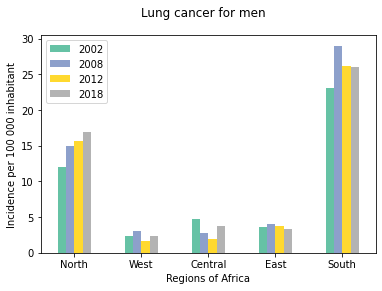

In [39]:
cmap = cm.get_cmap('Set2')
lcm.transpose().plot.bar(rot=0, cmap=cmap)
plt.suptitle('Lung cancer for men')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Regions of Africa')
#plt.savefig('Figures/lung2.png')
plt.show()

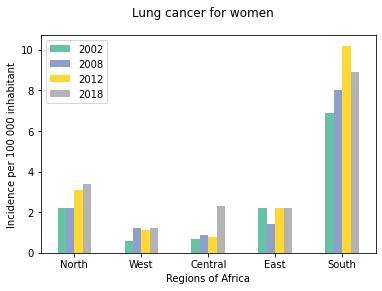

In [40]:
lcw.transpose().plot.bar(rot=0, cmap=cmap)
plt.suptitle('Lung cancer for women')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Regions of Africa')
#plt.savefig('Figures/lung3.png')
plt.show()

In [41]:
#Incidence Stomach cancer
stm = pd.DataFrame(evolution, columns=['St_C2M',  'St_C8M', 'St_C12M', 'St_C18M']).transpose()
stw = pd.DataFrame(evolution, columns=['St_C2F',  'St_C8F',  'St_C12F', 'St_C18F']).transpose()

#Both men and women

stm.index = annee
stw.index = annee
stomachsomme = stm.add(stw).transpose()/2
stomachsomme

,2002,2008,2012,2018
North,3.45,3.15,3.50,3.85
West,3.50,3.90,2.95,4.35
Central,13.00,5.00,4.00,4.70
East,6.45,4.80,4.55,4.35
South,5.95,3.15,5.05,4.00


In [42]:
#Incidence Colorectal cancer
csm = pd.DataFrame(evolution, columns=['Cr_C2M', 'Cr_C8M', 'Cr_C12M', 'Cr_C18M']).transpose()
csw = pd.DataFrame(evolution, columns=['Cr_C2F', 'Cr_C8F', 'Cr_C12F',  'Cr_C18F']).transpose()

       

#Both men and women
csm.index = annee
csw.index = annee
colorectalsomme = csm.add(csw).transpose()/2
colorectalsomme

,2002,2008,2012,2018
North,4.55,6.40,7.70,8.85
West,4.30,4.95,4.15,5.55
Central,2.80,3.80,4.75,6.35
East,5.10,5.25,6.60,7.00
South,10.10,14.30,11.50,13.55


In [43]:
#Incidence Eosophagus cancer
esm = pd.DataFrame(evolution, columns=['Es_C2M', 'Es_C8M', 'Es_C12M', 'Es_C18M']).transpose()
esw = pd.DataFrame(evolution, columns=['Es_C2F', 'Es_C8F', 'Es_C12F','Es_C18F']).transpose()

#Both men and women
esm.index = annee
esw.index = annee
eosophagussomme = esm.add(esw).transpose()/2
eosophagussomme

,2002,2008,2012,2018
North,1.75,1.80,1.95,1.55
West,0.95,1.20,0.60,1.20
Central,0.85,1.15,3.10,1.90
East,13.55,10.65,9.85,8.40
South,13.35,17.00,10.20,8.05


In [44]:
#Incidence Liver cancer
liverm = pd.DataFrame(evolution, columns=['Liver 2002 M', 'Liver 2008 M', 'Liver 2012 M', 'Liver 2018 M']).transpose()
liverw = pd.DataFrame(evolution, columns=['Liver 2002 F','Liver 2008 F','Liver 2012 F','Liver 2018 F']).transpose()

#Both men and women
liverm.index = annee
liverw.index = annee
Liversomme = liverm.add(liverw).transpose()/2
Liversomme

,2002,2008,2012,2018
North,3.20,5.00,12.50,14.30
West,10.45,12.30,12.25,8.40
Central,20.60,14.25,8.10,6.65
East,14.85,5.40,4.05,4.90
South,4.75,9.50,5.00,5.30


In [45]:
#Incidence Bladder cancer
bdm = pd.DataFrame(evolution, columns=['Bladder 2002 M', 'Bladder 2012 M', 'Bladder 2018 M']).transpose()
bdw = pd.DataFrame(evolution, columns=['Bladder 2002 F', 'Bladder 2012 F', 'Bladder 2018 F']).transpose()

#Both men and women
bdm.index = ["2002", "2008", "2018"]
bdw.index = ["2002", "2008", "2018"]
Bladdersomme = bdm.add(bdw).transpose()/2
Bladdersomme
#tym, tyw#, Thyroidsomme

,2002,2008,2018
North,11.95,9.15,8.75
West,2.70,1.70,1.85
Central,1.20,1.75,1.15
East,4.15,2.65,2.80
South,6.95,4.70,3.90


In [46]:
#Incidence Thyroide cancer
tym = pd.DataFrame(evolution, columns=[' Thyroid 2012 M', ' Thyroid 2018 M']).transpose()
tyw = pd.DataFrame(evolution, columns=['Thyroid 2012 F', 'Thyroid 2018 F']).transpose()

#Both men and women
tym.index = ["2012", "2018"]
tyw.index = ["2012", "2018"]
Thyroidsomme = tym.add(tyw).transpose()/2
Thyroidsomme

,2012,2018
North,2.90,3.65
West,0.65,1.00
Central,0.95,1.05
East,1.90,1.80
South,1.10,3.85


In [47]:
#Incidence Breast cancer
bcinc = pd.DataFrame(evolution, columns=["B_C2002", "B_C2008", "B_C2012", "BC_2018"]).transpose()
bcmort = pd.DataFrame(evolution, columns=['B_C2002Mort', 'B_C2008Mort', 'B_C2012Mort', 'BC_2018Mort']).transpose()

bcinc.index = annee
bcmort.index = annee

fat = bcmort.div(bcinc).transpose()*100 # breast cancer fatality 
fat

,2002,2008,2012,2018
North,71.982759,54.434251,40.277778,37.627812
West,70.503597,59.748428,52.072539,47.721180
Central,73.333333,61.502347,55.597015,56.630824
East,72.307692,59.067358,51.315789,51.505017
South,48.802395,50.656168,39.845758,33.766234


In [48]:
#Incidence Cervix uteri cancer
cervixinc = pd.DataFrame(evolution, columns=['Cervix2002', 'Cervix2008', 'Cervix2012', 'Cervix2018']).transpose()
cervixmort = pd.DataFrame(evolution, columns=['Cervix2002Mort', 'Cervix2008Mort', 'Cervix2012Mort', 'Cervix2018Mort']).transpose()

cervixinc.index = annee
cervixmort.index = annee

fat = cervixmort.div(cervixinc).transpose()*100 # breast cancer fatality 
fat

,2002,2008,2012,2018
North,80.991736,60.606061,48.484848,70.833333
West,81.228669,71.216617,63.139932,77.702703
Central,82.142857,73.913043,72.549020,78.731343
East,81.030445,73.333333,64.637002,74.812968
South,59.162304,55.223881,56.825397,46.403712


In [49]:
#Incidence Prostate cancer
prostinc = pd.DataFrame(evolution, columns=['Prost2002', 'Prost2008', 'Prost2012', 'Prost2018']).transpose()
prostmort = pd.DataFrame(evolution, columns=['Prost2002Mort', 'Prost2008Mort', 'Prost2012Mort', 'Prost2018Mort']).transpose()

prostinc.index = annee
prostmort.index = annee

fat = prostmort.div(prostinc).transpose()*100 # breast cancer fatality 
fat

,2002,2008,2012,2018
North,84.482759,76.543210,66.037736,43.939394
West,82.901554,82.432432,84.462151,58.307210
Central,86.122449,81.707317,89.629630,63.231198
East,85.507246,80.689655,80.257511,61.924686
South,55.308642,35.807050,39.482201,41.809672


In [50]:
#North = ["MOR","ALG","TUN","LIB","EGY","SUD"]
#South = ["NAM","BOT","SAF","SWA","LES"] #ok
#Central = ["CHD","CAF","CMR","EQG","GAB","PRC","ZAI","ANG", "STP"]
#'CAP', 'GUB', 'WES', 'GIN=GUI', CDI, MAL, BUF, NIG, 
#Reste South Sudan au Nord ; 
#West = ["MAU","SEN","GAM","GUI","SIL","LIR","GHA","TOG","BEN","NIR", "BKF", "CVI", "IVC", "GBS", "MLI", "NER"]
#East = ["BDI", "COI", "DJI", "ERI", "ETH", "KEN", "MAG", "MLW", "MAR", "MOZ", "RWA", "SEY", "SOM", "UGA", "ZAM", "ZIM", "URT"]

In [51]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [52]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [53]:
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [54]:
orient = earth[earth.continent=='Asia'].copy()
pal = orient[orient.name=='Palestine']
pal.to_csv(r'earth.csv', index = False)

In [55]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [56]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region
70,15972000,Africa,Zambia,ZMB,65170.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",East
54,11038805,Africa,Benin,BEN,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....",West
48,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",East
72,26573706,Africa,Mozambique,MOZ,35010.0,"POLYGON ((34.55999 -11.52002, 35.31240 -11.439...",East
56,190632261,Africa,Nigeria,NGA,1089000.0,"POLYGON ((2.69170 6.25882, 2.74906 7.87073, 2....",West


In [57]:
lungsomme

,2002,2008,2012,2018
North,7.1,8.55,9.35,10.15
West,1.5,2.15,1.40,1.80
Central,2.7,1.85,1.40,3.05
East,2.9,2.75,3.00,2.80
South,15.0,18.50,18.15,17.45


In [58]:
LC = lungsomme['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2002'] = reg

LC = lungsomme['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2008'] = reg

LC = lungsomme['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2012'] = reg

LC = lungsomme['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
#print(africa['Region'].iloc[0]), print(reg[0])
africa['Lung2018'] = reg


Central
2.7
Central
1.8499999999999999
Central
1.4


In [59]:
africa.sample()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Lung2002,Lung2008,Lung2012,Lung2018
168,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",East,2.9,2.75,3.0,2.8


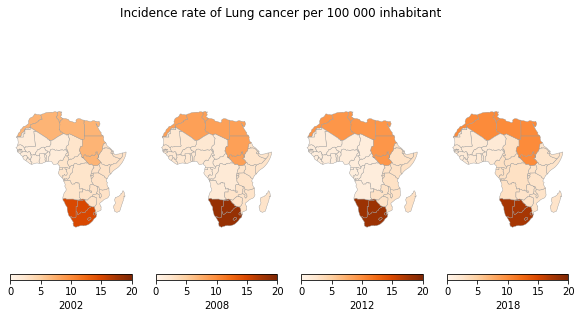

In [60]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#from cartopy import crs as ccrs

vmin, vmax = 0, 20
cmap = cm.get_cmap('Oranges')
#, vmin=vmin, vmax=vmax
#plt.savefig('Figures/.png')

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Lung cancer per 100 000 inhabitant')
# Make the CartoPy plot
line1 = africa.plot(column="Lung2002", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line2 = africa.plot(column="Lung2008", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line3 = africa.plot(column="Lung2012", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line4 = africa.plot(column="Lung2018", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
#ax = plt.gca()
#ax.set_xlim(0, 20)
#plt.savefig('Figures/lung1.png')
plt.show()

In [61]:
#africa.filter(['Lung2002', 'Lung2008'])

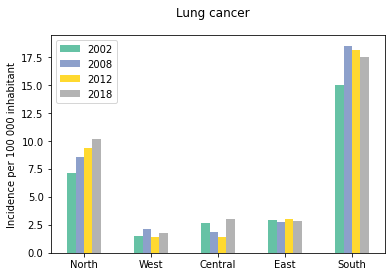

In [62]:
#cmap = cm.get_cmap('Greens')
cmap = cm.get_cmap('Set2')
index = ['North', 'West', 'Central', 'East', 'South']
df = pd.DataFrame(lungsomme, index=index)
ax = df.plot.bar(rot=0, cmap=cmap)
plt.suptitle('Lung cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
#plt.savefig('Figures/lung4.png')
plt.show()

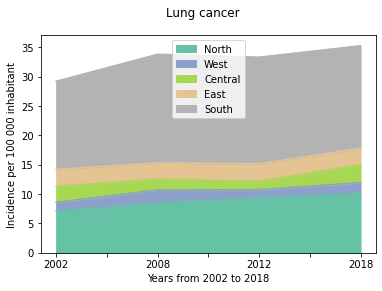

In [63]:
df.transpose().plot.area(cmap=cmap)
plt.suptitle('Lung cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Years from 2002 to 2018')
#plt.savefig('Figures/lung5.png')
plt.show()

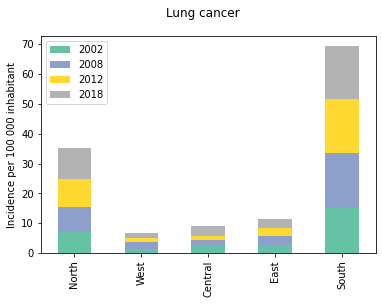

In [64]:
df.plot(kind='bar', stacked=True, cmap=cmap)
plt.suptitle('Lung cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
#plt.savefig('Figures/lung6.png')
plt.show()

In [65]:
lungsomme

,2002,2008,2012,2018
North,7.1,8.55,9.35,10.15
West,1.5,2.15,1.40,1.80
Central,2.7,1.85,1.40,3.05
East,2.9,2.75,3.00,2.80
South,15.0,18.50,18.15,17.45


In [66]:
stomachsomme

,2002,2008,2012,2018
North,3.45,3.15,3.50,3.85
West,3.50,3.90,2.95,4.35
Central,13.00,5.00,4.00,4.70
East,6.45,4.80,4.55,4.35
South,5.95,3.15,5.05,4.00


In [67]:
colorectalsomme

,2002,2008,2012,2018
North,4.55,6.40,7.70,8.85
West,4.30,4.95,4.15,5.55
Central,2.80,3.80,4.75,6.35
East,5.10,5.25,6.60,7.00
South,10.10,14.30,11.50,13.55


In [68]:
eosophagussomme

,2002,2008,2012,2018
North,1.75,1.80,1.95,1.55
West,0.95,1.20,0.60,1.20
Central,0.85,1.15,3.10,1.90
East,13.55,10.65,9.85,8.40
South,13.35,17.00,10.20,8.05


In [69]:
Liversomme

,2002,2008,2012,2018
North,3.20,5.00,12.50,14.30
West,10.45,12.30,12.25,8.40
Central,20.60,14.25,8.10,6.65
East,14.85,5.40,4.05,4.90
South,4.75,9.50,5.00,5.30


In [70]:
Bladdersomme

,2002,2008,2018
North,11.95,9.15,8.75
West,2.70,1.70,1.85
Central,1.20,1.75,1.15
East,4.15,2.65,2.80
South,6.95,4.70,3.90


In [71]:
Thyroidsomme

,2012,2018
North,2.90,3.65
West,0.65,1.00
Central,0.95,1.05
East,1.90,1.80
South,1.10,3.85


In [72]:
df = lungsomme + stomachsomme + colorectalsomme + eosophagussomme + Liversomme #+ Bladdersomme + Thyroidsomme
df

,2002,2008,2012,2018
North,20.05,24.90,35.00,38.70
West,20.70,24.50,21.35,21.30
Central,39.95,26.05,21.35,22.65
East,42.85,28.85,28.05,27.45
South,49.15,62.45,49.90,48.35


In [73]:
LC = df['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'East':
        reg[i] = LC.iloc[1]
    elif x == 'West':
        reg[i] = LC.iloc[2]
    elif x == 'Central':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['cancer2002'] = reg

LC = df['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'East':
        reg[i] = LC.iloc[1]
    elif x == 'West':
        reg[i] = LC.iloc[2]
    elif x == 'Central':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['cancer2008'] = reg

LC = df['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'East':
        reg[i] = LC.iloc[1]
    elif x == 'West':
        reg[i] = LC.iloc[2]
    elif x == 'Central':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['cancer2012'] = reg

LC = df['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'East':
        reg[i] = LC.iloc[1]
    elif x == 'West':
        reg[i] = LC.iloc[2]
    elif x == 'Central':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
#print(africa['Region'].iloc[0]), print(reg[0])
africa['cancer2018'] = reg



Central
42.85
Central
28.85
Central
28.05


In [74]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Lung2002,Lung2008,Lung2012,Lung2018,cancer2002,cancer2008,cancer2012,cancer2018
69,778358,Africa,Eq. Guinea,GNQ,31770.0,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...",Central,2.7,1.85,1.40,3.05,42.85,28.85,28.05,27.45
154,5918919,Africa,Eritrea,ERI,9169.0,"POLYGON ((36.42951 14.42211, 36.32322 14.82249...",East,2.9,2.75,3.00,2.80,20.70,24.50,21.35,21.30
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",East,2.9,2.75,3.00,2.80,20.70,24.50,21.35,21.30
60,24184810,Africa,Côte d'Ivoire,CIV,87120.0,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738...",West,1.5,2.15,1.40,1.80,39.95,26.05,21.35,22.65
82,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",North,7.1,8.55,9.35,10.15,20.05,24.90,35.00,38.70


In [75]:
df = africa.copy()
df['cancer2002'] = df['cancer2002']/max(df['cancer2002'])
df['cancer2008'] = df['cancer2008']/max(df['cancer2008'])
df['cancer2012'] = df['cancer2012']/max(df['cancer2012'])
df['cancer2018'] = df['cancer2018']/max(df['cancer2018'])


In [76]:
s1 = (df['Lung2002'].max() + df['Lung2008'].max() + df['Lung2012'].max() + df['Lung2018'].max())/4


In [77]:
df = africa.copy()
df['L02'] = df['Lung2002']/s1
df['L08'] = df['Lung2008']/s1
df['L12'] = df['Lung2012']/s1
df['L18'] = df['Lung2018']/s1


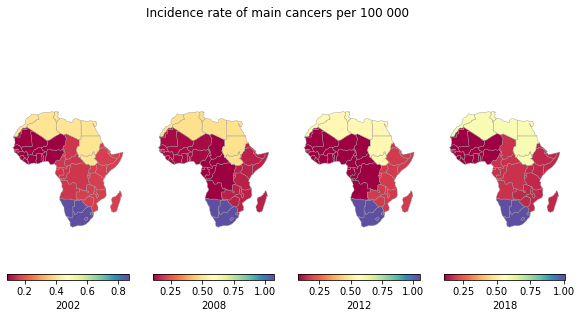

In [78]:
#cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
cmap = cm.get_cmap('Spectral')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of main cancers per 100 000')
# Make the CartoPy plot
line1 = df.plot(column="L02", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"})

line2 = df.plot(column="L08", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"})

line3 = df.plot(column="L12", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"})

line4 = df.plot(column="L18", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"})
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
plt.show()

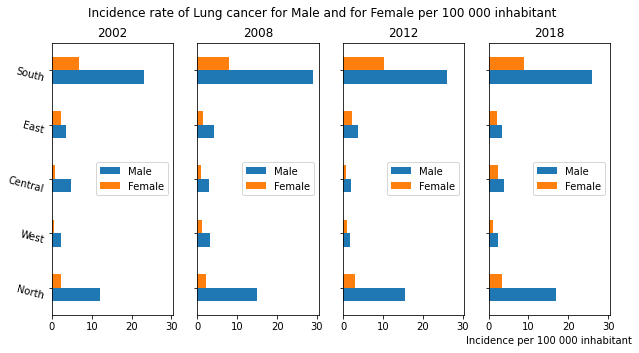

In [79]:
# A python dictionary

data2002 = {"Male":lcm.iloc[0], "Female":lcw.iloc[0], }; 
data2002 = pd.DataFrame(data=data2002, index=index);

data2008 = {"Male":lcm.iloc[1], "Female":lcw.iloc[1], }; 
data2008 = pd.DataFrame(data=data2008, index=index);

data2012 = {"Male":lcm.iloc[2], "Female":lcw.iloc[2], }; 
data2012 = pd.DataFrame(data=data2012, index=index);

data2018 = {"Male":lcm.iloc[3], "Female":lcw.iloc[3], }; 
data2018 = pd.DataFrame(data=data2018, index=index);

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Lung cancer for Male and for Female per 100 000 inhabitant')
    
p1 = data2002.plot.barh(stacked=False, rot=-15, ax=axs[0], title="2002");
p2 = data2008.plot.barh(stacked=False, rot=-15, ax=axs[1], title="2008");
p3 = data2012.plot.barh(stacked=False, rot=-15, ax=axs[2], title="2012");
p4 = data2018.plot.barh(stacked=False, rot=-15, ax=axs[3], title="2018");

plt.xlabel('Incidence per 100 000 inhabitant')
plt.ylabel('Regions of Africa')
plt.legend()
#plt.savefig('Figures/lung7.png')
plt.show(block=True);

In [80]:
lcm

,North,West,Central,East,South
2002,12.0,2.4,4.7,3.6,23.1
2008,14.9,3.1,2.8,4.1,29.0
2012,15.6,1.7,2.0,3.8,26.1
2018,16.9,2.4,3.8,3.4,26.0
